In [1]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import re
import warnings
warnings.simplefilter('ignore')

#Specifying which teams and years to include in data set
Teams = ['OAK']
#Teams = ['SFG']
#Teams = ['SFG', 'OAK', 'LAA', 'LAD', 'CHC', 'CHW']
Years = ['2019']
#for year in range(2016,2020):
#    Years.append(str(year))

list_of_df = list()

#Creating dataframe
for team in Teams:
    for year in Years:
        #Will retrieve data from each year for each team
        url = 'https://www.baseball-reference.com/teams/' + team + '/' + year +'-schedule-scores.shtml'
        dfname = team + '_' + year
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        
        #Formatting data table
        #rename columns
        df.rename(columns={"Gm#": "GM_Num"}, inplace = True)
        df = df[df['GM_Num'].str.isdigit()]
        df = df[['Date','Attendance']]
        #Turn date into datetime object
        DayDate = df['Date'].str.split(", ", n = 1, expand = True)
        df['Date'] = DayDate[1] + ', ' + year
        df['Date'] = [re.sub("\s\(\d+\)", "", str(x)) for x in df['Date']]
        df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
        #Add to list which will be turned into a dataframe
        list_of_df.append(df)

#Create dataframe
bbattend = pd.concat(list_of_df)


In [2]:
bbattend.dtypes
bbattend.head()

,Date,Attendance
0,2019-03-20,45787
1,2019-03-21,46451
2,2019-03-28,22691
3,2019-03-29,22585
4,2019-03-30,16051


In [3]:
#print(bbattend.Attendance)

In [4]:
OAKdf = bbattend
OAKdf = OAKdf[pd.notnull(OAKdf['Attendance'])]
OAKdf['Attendance'] = OAKdf['Attendance'].astype(int)
OAKdf.dtypes

Date          datetime64[ns]
Attendance             int64
dtype: object

In [5]:
OAKdf.head()

,Date,Attendance
0,2019-03-20,45787
1,2019-03-21,46451
2,2019-03-28,22691
3,2019-03-29,22585
4,2019-03-30,16051


In [6]:

Teams = ['SFG']
Years = ['2019']


list_of_df = list()

#Creating dataframe
for team in Teams:
    for year in Years:
        #Will retrieve data from each year for each team
        url = 'https://www.baseball-reference.com/teams/' + team + '/' + year +'-schedule-scores.shtml'
        dfname = team + '_' + year
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        
        #Formatting data table
        #rename columns
        df.rename(columns={"Gm#": "GM_Num"}, inplace = True)
        df = df[df['GM_Num'].str.isdigit()]
        df = df[['Date','Attendance']]
        #Turn date into datetime object
        DayDate = df['Date'].str.split(", ", n = 1, expand = True)
        df['Date'] = DayDate[1] + ', ' + year
        df['Date'] = [re.sub("\s\(\d+\)", "", str(x)) for x in df['Date']]
        df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
        #Add to list which will be turned into a dataframe
        list_of_df.append(df)

#Create dataframe
bbattend = pd.concat(list_of_df)

In [7]:
SFGdf = bbattend
SFGdf = SFGdf[pd.notnull(SFGdf['Attendance'])]
#OAKdf['Attendance'] = OAKdf['Attendance'].astype(str).astype(int)
SFGdf['Attendance'] = SFGdf['Attendance'].astype(int)
SFGdf.dtypes

Date          datetime64[ns]
Attendance             int64
dtype: object

In [8]:
SFGdf = SFGdf.dropna()
SFGdf.head()

,Date,Attendance
0,2019-03-28,44655
1,2019-03-29,33769
2,2019-03-30,41899
3,2019-03-31,38444
5,2019-04-01,40477


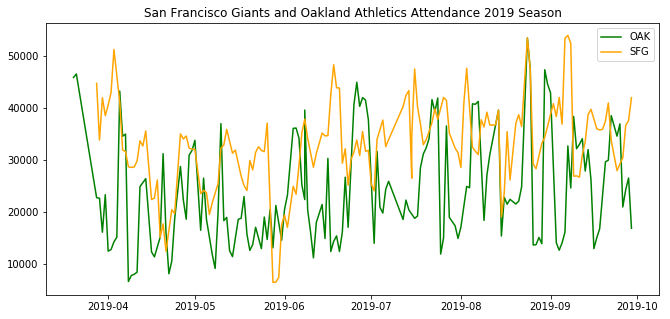

In [20]:
import datetime as dt              
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(11,5))
ax.plot(OAKdf.Date, OAKdf.Attendance, color = 'green', label='OAK')
ax.plot(SFGdf.Date, SFGdf.Attendance, color = 'orange', label='SFG')
ax.set_title('San Francisco Giants and Oakland Athletics Attendance 2019 Season')
ax.legend()

plt.show()

In [10]:
Teams = ['LAA']

list_of_df = list()

#Creating dataframe
for team in Teams:
    for year in Years:
        #Will retrieve data from each year for each team
        url = 'https://www.baseball-reference.com/teams/' + team + '/' + year +'-schedule-scores.shtml'
        dfname = team + '_' + year
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        
        #Formatting data table
        #rename columns
        df.rename(columns={"Gm#": "GM_Num"}, inplace = True)
        df = df[df['GM_Num'].str.isdigit()]
        df = df[['Date','Attendance']]
        #Turn date into datetime object
        DayDate = df['Date'].str.split(", ", n = 1, expand = True)
        df['Date'] = DayDate[1] + ', ' + year
        df['Date'] = [re.sub("\s\(\d+\)", "", str(x)) for x in df['Date']]
        df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
        #Add to list which will be turned into a dataframe
        list_of_df.append(df)

#Create dataframe
bbattend = pd.concat(list_of_df)
LAAdf = bbattend
LAAdf = LAAdf[pd.notnull(LAAdf['Attendance'])]
LAAdf['Attendance'] = LAAdf['Attendance'].astype(int)

In [11]:
Teams = ['LAD']
#Teams = ['SFG', 'OAK', 'LAA', 'LAD', 'CHC', 'CHW']
#for year in range(2016,2020):
#    Years.append(str(year))

list_of_df = list()

#Creating dataframe
for team in Teams:
    for year in Years:
        #Will retrieve data from each year for each team
        url = 'https://www.baseball-reference.com/teams/' + team + '/' + year +'-schedule-scores.shtml'
        dfname = team + '_' + year
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        
        #Formatting data table
        #rename columns
        df.rename(columns={"Gm#": "GM_Num"}, inplace = True)
        df = df[df['GM_Num'].str.isdigit()]
        df = df[['Date','Attendance']]
        #Turn date into datetime object
        DayDate = df['Date'].str.split(", ", n = 1, expand = True)
        df['Date'] = DayDate[1] + ', ' + year
        df['Date'] = [re.sub("\s\(\d+\)", "", str(x)) for x in df['Date']]
        df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
        #Add to list which will be turned into a dataframe
        list_of_df.append(df)

#Create dataframe
bbattend = pd.concat(list_of_df)
LADdf = bbattend
LADdf = LADdf[pd.notnull(LADdf['Attendance'])]
LADdf['Attendance'] = LADdf['Attendance'].astype(int)

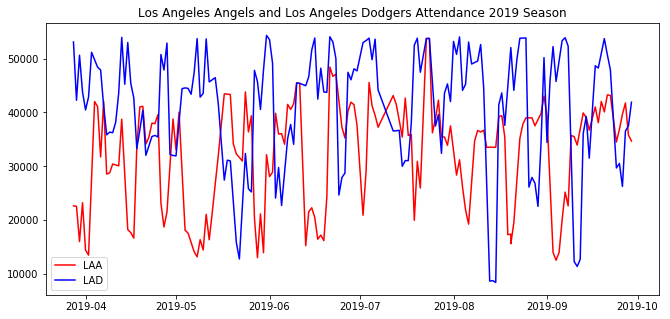

In [12]:
fig, ax = plt.subplots(figsize=(11,5))
ax.plot(LAAdf.Date, LAAdf.Attendance, color = 'red', label='LAA')
ax.plot(LADdf.Date, LADdf.Attendance, color = 'blue', label='LAD')
ax.set_title('Los Angeles Angels and Los Angeles Dodgers Attendance 2019 Season')
ax.legend()
plt.show()

In [13]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import re
import warnings
warnings.simplefilter('ignore')

#Specifying which teams and years to include in data set
#Teams = ['OAK']
Teams = ['CHC']
#Teams = ['SFG', 'OAK', 'LAA', 'LAD', 'CHC', 'CHW']
#for year in range(2016,2020):
#    Years.append(str(year))

list_of_df = list()

#Creating dataframe
for team in Teams:
    for year in Years:
        #Will retrieve data from each year for each team
        url = 'https://www.baseball-reference.com/teams/' + team + '/' + year +'-schedule-scores.shtml'
        dfname = team + '_' + year
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        
        #Formatting data table
        #rename columns
        df.rename(columns={"Gm#": "GM_Num"}, inplace = True)
        df = df[df['GM_Num'].str.isdigit()]
        df = df[['Date','Attendance']]
        #Turn date into datetime object
        DayDate = df['Date'].str.split(", ", n = 1, expand = True)
        df['Date'] = DayDate[1] + ', ' + year
        df['Date'] = [re.sub("\s\(\d+\)", "", str(x)) for x in df['Date']]
        df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
        #Add to list which will be turned into a dataframe
        list_of_df.append(df)

#Create dataframe
bbattend = pd.concat(list_of_df)
CHCdf = bbattend
CHCdf = CHCdf[pd.notnull(CHCdf['Attendance'])]
CHCdf['Attendance'] = CHCdf['Attendance'].astype(int)

In [14]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime
import re
import warnings
warnings.simplefilter('ignore')

#Specifying which teams and years to include in data set
#Teams = ['OAK']
Teams = ['CHW']
#Teams = ['SFG', 'OAK', 'LAA', 'LAD', 'CHC', 'CHW']
#for year in range(2016,2020):
#    Years.append(str(year))

list_of_df = list()

#Creating dataframe
for team in Teams:
    for year in Years:
        #Will retrieve data from each year for each team
        url = 'https://www.baseball-reference.com/teams/' + team + '/' + year +'-schedule-scores.shtml'
        dfname = team + '_' + year
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        
        #Formatting data table
        #rename columns
        df.rename(columns={"Gm#": "GM_Num"}, inplace = True)
        df = df[df['GM_Num'].str.isdigit()]
        df = df[['Date','Attendance']]
        #Turn date into datetime object
        DayDate = df['Date'].str.split(", ", n = 1, expand = True)
        df['Date'] = DayDate[1] + ', ' + year
        df['Date'] = [re.sub("\s\(\d+\)", "", str(x)) for x in df['Date']]
        df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
        #Add to list which will be turned into a dataframe
        list_of_df.append(df)

#Create dataframe
bbattend = pd.concat(list_of_df)
CHWdf = bbattend
CHWdf = CHWdf[pd.notnull(CHWdf['Attendance'])]
CHWdf['Attendance'] = CHWdf['Attendance'].astype(int)

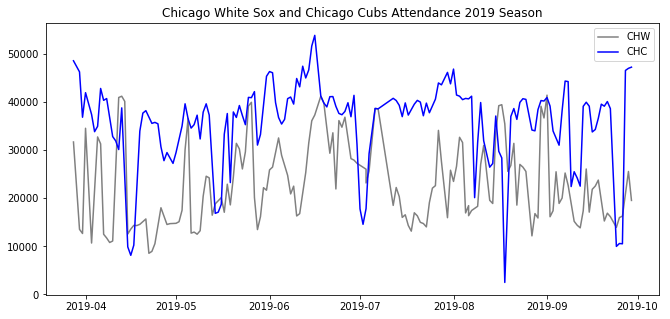

In [15]:
fig, ax = plt.subplots(figsize=(11,5))
ax.plot(CHWdf.Date, CHWdf.Attendance, color = 'gray', label='CHW')
ax.plot(CHCdf.Date, CHCdf.Attendance, color = 'blue', label='CHC')
ax.set_title('Chicago White Sox and Chicago Cubs Attendance 2019 Season')
ax.legend()
plt.show()

In [16]:
Teams = ['NYY']
#Teams = ['SFG', 'OAK', 'LAA', 'LAD', 'CHC', 'CHW']
#for year in range(2016,2020):
#    Years.append(str(year))

list_of_df = list()

#Creating dataframe
for team in Teams:
    for year in Years:
        #Will retrieve data from each year for each team
        url = 'https://www.baseball-reference.com/teams/' + team + '/' + year +'-schedule-scores.shtml'
        dfname = team + '_' + year
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        
        #Formatting data table
        #rename columns
        df.rename(columns={"Gm#": "GM_Num"}, inplace = True)
        df = df[df['GM_Num'].str.isdigit()]
        df = df[['Date','Attendance']]
        #Turn date into datetime object
        DayDate = df['Date'].str.split(", ", n = 1, expand = True)
        df['Date'] = DayDate[1] + ', ' + year
        df['Date'] = [re.sub("\s\(\d+\)", "", str(x)) for x in df['Date']]
        df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
        #Add to list which will be turned into a dataframe
        list_of_df.append(df)

#Create dataframe
bbattend = pd.concat(list_of_df)
NYYdf = bbattend
NYYdf = NYYdf[pd.notnull(NYYdf['Attendance'])]
NYYdf['Attendance'] = NYYdf['Attendance'].astype(int)

In [17]:
Teams = ['NYM']

list_of_df = list()

#Creating dataframe
for team in Teams:
    for year in Years:
        #Will retrieve data from each year for each team
        url = 'https://www.baseball-reference.com/teams/' + team + '/' + year +'-schedule-scores.shtml'
        dfname = team + '_' + year
        html = requests.get(url).content
        df_list = pd.read_html(html)
        df = df_list[-1]
        
        #Formatting data table
        #rename columns
        df.rename(columns={"Gm#": "GM_Num"}, inplace = True)
        df = df[df['GM_Num'].str.isdigit()]
        df = df[['Date','Attendance']]
        #Turn date into datetime object
        DayDate = df['Date'].str.split(", ", n = 1, expand = True)
        df['Date'] = DayDate[1] + ', ' + year
        df['Date'] = [re.sub("\s\(\d+\)", "", str(x)) for x in df['Date']]
        df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
        #Add to list which will be turned into a dataframe
        list_of_df.append(df)

#Create dataframe
bbattend = pd.concat(list_of_df)
NYMdf = bbattend
NYMdf = NYMdf[pd.notnull(NYMdf['Attendance'])]
NYMdf['Attendance'] = NYMdf['Attendance'].astype(int)

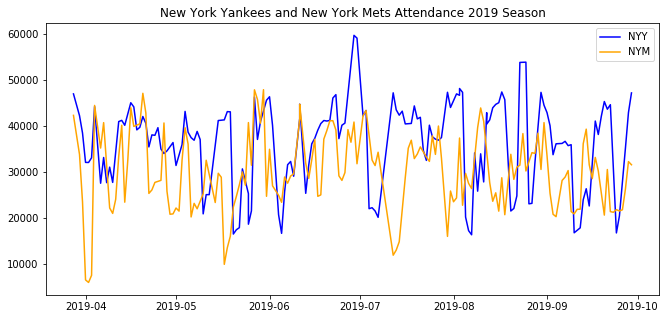

In [18]:
fig, ax = plt.subplots(figsize=(11,5))
ax.plot(NYYdf.Date, NYYdf.Attendance, color = 'blue', label='NYY')
ax.plot(NYMdf.Date, NYMdf.Attendance, color = 'orange', label='NYM')
ax.set_title('New York Yankees and New York Mets Attendance 2019 Season')
ax.legend()
plt.show()

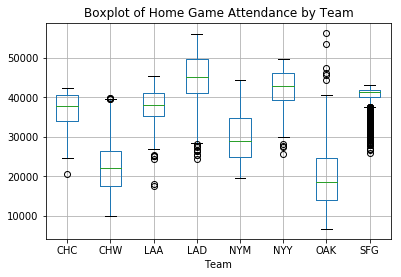

In [19]:
bbattendhome =pd.read_csv("bbattendhome.csv")
bbattendhome['Year'] = pd.DatetimeIndex(bbattendhome['Date']).year
#bbattendhome.head()
bbattendhome.boxplot(column='Attendance', by='Team')
plt.title("Boxplot of Home Game Attendance by Team")
plt.suptitle("")

plt.show()